**02: Reading Data & Bar Charts**

In [4]:
from matplotlib import pyplot as plt
import numpy as np

In [17]:
ages = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]

js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]

***
Bar Charts:
- plt.bar method used in place of plt.plot

<BarContainer object of 11 artists>

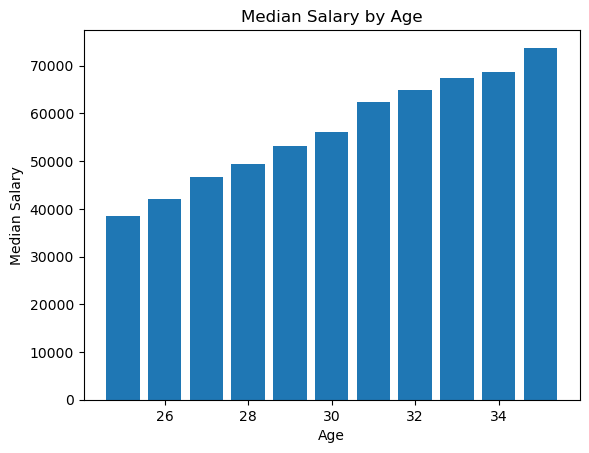

In [20]:
plt.title('Median Salary by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary')

plt.bar(ages, dev_y)

Multiple bar plots:
- Repeating plt.bar by itself will create overlapping bar charts, which could screen off other plots
- Offsetting the x-axis for each plot is required to prevent overlapping.
  1. import numpy
  2. np.arange to create a variable for the length of x axis
  3. variable for width of bars
  4. plt.xticks to match x axis to dataset

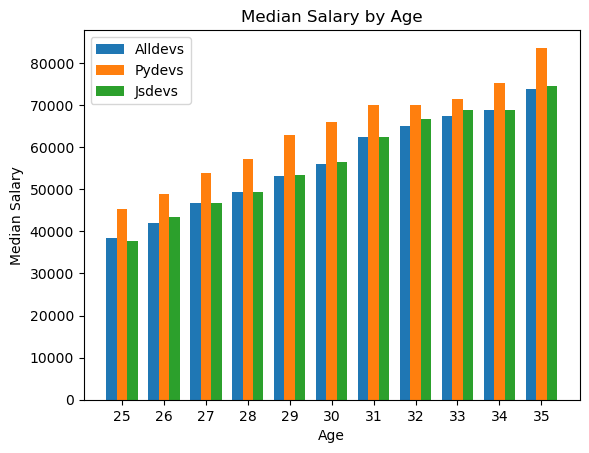

In [34]:
plt.title('Median Salary by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary')

x_indexes = np.arange(len(ages))
width = 0.25
plt.xticks(ticks=x_indexes, labels=ages)

plt.bar(x_indexes - width, dev_y, width = width, label = 'Alldevs')
plt.bar(x_indexes, py_dev_y, width = width, label = 'Pydevs')
plt.bar(x_indexes + width, js_dev_y, width = width, label = 'Jsdevs')

plt.legend()

This method is rather clunky, but apparently the best method available. If more bar charts need to be compared, consider reducing the width through the width variable.

***
Reading Data:
- From mpldata in the same directory
- pandas module will be used in this section since it is more workable. csv module can be used but it is more inconvenient.

In [6]:
import pandas as pd
#to read csv files

In [8]:
df = pd.read_csv('02_03_mpldata.csv')
df.head()
#note how languages are delimited by semicolons

,Responder_id,LanguagesWorkedWith
0,1,HTML/CSS;Java;JavaScript;Python
1,2,C++;HTML/CSS;Python
2,3,HTML/CSS
3,4,C;C++;C#;Python;SQL
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


***
Counters:

Python has a built-in class called counters. This is not related whatsoever to the pandas or matplotlib library.

Counters are able to count the number of occurences for multiple responses in a large dataset. In this case, the number of respondents who know how to use each language is required.

In [26]:
from collections import Counter

In [28]:
c = Counter(['Apple', 'Banana', 'Apple'])
c

Counter({'Apple': 2, 'Banana': 1})

A function, best assigned to a variable. An iterable is passed into it, where it creates keys for each value in the iterable, and returns a count as the keys' value

In [32]:
c.update(['Pear', 'Apple'])
c

Counter({'Apple': 3, 'Banana': 1, 'Pear': 1})

It is also possible to update the counter using the .update function on a Counter object. Intuitive, it adds on the counter values for repeated items, and adds new keys for new items

In [22]:
ids = df['Responder_id']
langs = df['LanguagesWorkedWith']
#Assigning each column to a variable. This variable is a Pandas series object

In [40]:
lang_counter = Counter()
#not intending to count anything yet, until responses are passed into it

#loop through every row to obtain ever response
for response in langs:
    lang_counter.update(response.split(';'))
    #response.split(';') creates an iterable (list), where the original counter is updated with its values

lang_counter.most_common(15)

[('JavaScript', 59219),
 ('HTML/CSS', 55466),
 ('SQL', 47544),
 ('Python', 36443),
 ('Java', 35917),
 ('Bash/Shell/PowerShell', 31991),
 ('C#', 27097),
 ('PHP', 23030),
 ('C++', 20524),
 ('TypeScript', 18523),
 ('C', 18017),
 ('Other(s):', 7920),
 ('Ruby', 7331),
 ('Go', 7201),
 ('Assembly', 5833)]

The .most_common(x) method shows the x most common responses i.e the ones with the highest count.

Notice that a list containing tuples is returned. Previously, it is known that matplotlib is unable to process this data directly. Parse the data to a matplotlib readable form (i.e into lists for each axes)

In [50]:
lang_x = [i[0] for i in lang_counter.most_common(15)]
number_y = [i[1] / 1000 for i in lang_counter.most_common(15)]
#good practice to verify if each list contains the desired values

Finally, the bar chart can be plotted. Remember to pass in any extra details of the plot.

- plt.barh used to make horizontal bar charts
- It is advised to use horizontal bar charts when the x-axis has many long values
- Important to note axes are switched when using horizontal bar charts

<BarContainer object of 15 artists>

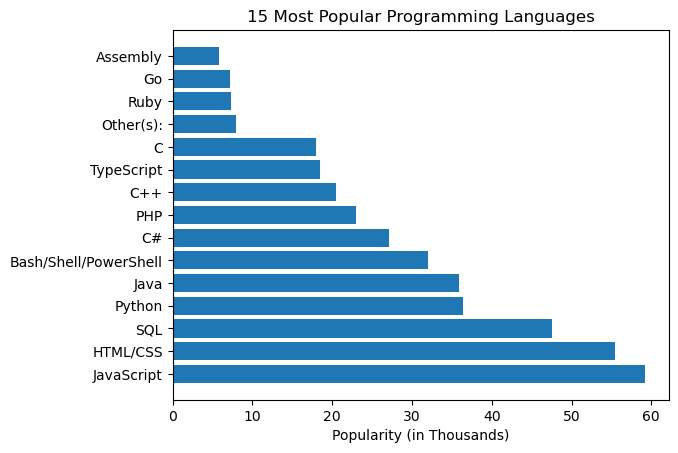

In [61]:
plt.xlabel('Popularity (in Thousands)')
plt.title('15 Most Popular Programming Languages')

plt.barh(lang_x, number_y)

<BarContainer object of 15 artists>

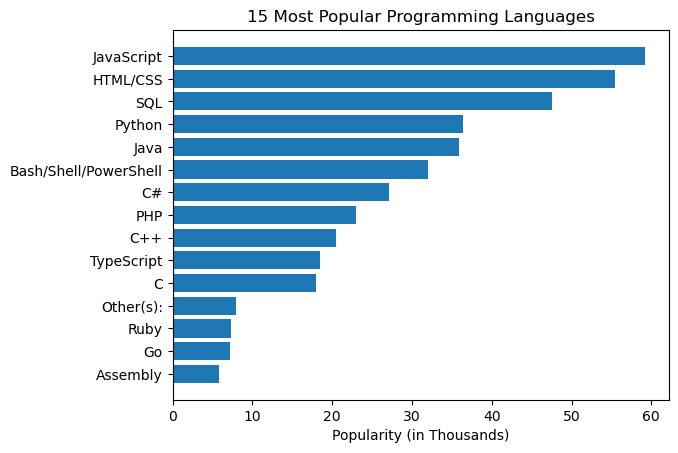

In [71]:
lang_x.reverse()
number_y.reverse()
#turns the bar chart upside down if it is more useful

plt.xlabel('Popularity (in Thousands)')
plt.title('15 Most Popular Programming Languages')

plt.barh(lang_x, number_y)